In [249]:
from azureml.core import Workspace
ws = Workspace.from_config()

In [250]:
from azureml.core import Experiment
experiment = Experiment(workspace=ws, name="stock-experiment")

In [251]:
# load relaince data from csv
import numpy as np
import pandas as pd
data_set = pd.read_csv("./RELIANCE.BO.csv")
print(data_set)

           Date         Open         High          Low        Close  \
0    2018-09-17  1251.900024  1251.900024  1220.500000  1226.250000   
1    2018-09-18  1224.000000  1238.900024  1214.250000  1217.199951   
2    2018-09-19  1225.000000  1227.000000  1201.199951  1210.300049   
3    2018-09-21  1220.050049  1237.099976  1183.199951  1216.849976   
4    2018-09-24  1216.000000  1239.900024  1204.250000  1232.300049   
5    2018-09-25  1233.300049  1244.900024  1195.750000  1230.599976   
6    2018-09-26  1235.199951  1254.099976  1226.800049  1251.750000   
7    2018-09-27  1259.800049  1263.250000  1238.599976  1252.900024   
8    2018-09-28  1260.000000  1271.099976  1247.650024  1258.199951   
9    2018-10-01  1258.199951  1260.000000  1204.300049  1231.550049   
10   2018-10-03  1233.099976  1239.750000  1198.699951  1205.300049   
11   2018-10-04  1199.000000  1199.000000  1105.050049  1120.550049   
12   2018-10-05  1102.599976  1115.550049  1039.550049  1049.849976   
13   2

In [252]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [253]:
new_data = pd.DataFrame(index=range(0,len(data_set)),columns=['Date', 'Close'])
for i in range(0,len(new_data)):
    new_data['Date'][i] = data_set['Date'][i]
    new_data['Close'][i] = data_set['Close'][i]
print(new_data)

           Date    Close
0    2018-09-17  1226.25
1    2018-09-18   1217.2
2    2018-09-19   1210.3
3    2018-09-21  1216.85
4    2018-09-24   1232.3
5    2018-09-25   1230.6
6    2018-09-26  1251.75
7    2018-09-27   1252.9
8    2018-09-28   1258.2
9    2018-10-01  1231.55
10   2018-10-03   1205.3
11   2018-10-04  1120.55
12   2018-10-05  1049.85
13   2018-10-08  1107.95
14   2018-10-09   1090.4
15   2018-10-10  1102.35
16   2018-10-11   1089.2
17   2018-10-12   1126.4
18   2018-10-15   1139.8
19   2018-10-16  1163.65
20   2018-10-17   1148.9
21   2018-10-19  1101.65
22   2018-10-22  1062.45
23   2018-10-23   1052.6
24   2018-10-24   1046.6
25   2018-10-25   1030.2
26   2018-10-26   1044.7
27   2018-10-29     1088
28   2018-10-30  1057.15
29   2018-10-31   1061.4
..          ...      ...
211  2019-07-30  1180.55
212  2019-07-31     1166
213  2019-08-01  1180.55
214  2019-08-02   1184.2
215  2019-08-05     1143
216  2019-08-06     1128
217  2019-08-07     1109
218  2019-08-08  1151.95


In [254]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

In [255]:
print(new_data)

              Close
Date               
2018-09-17  1226.25
2018-09-18   1217.2
2018-09-19   1210.3
2018-09-21  1216.85
2018-09-24   1232.3
2018-09-25   1230.6
2018-09-26  1251.75
2018-09-27   1252.9
2018-09-28   1258.2
2018-10-01  1231.55
2018-10-03   1205.3
2018-10-04  1120.55
2018-10-05  1049.85
2018-10-08  1107.95
2018-10-09   1090.4
2018-10-10  1102.35
2018-10-11   1089.2
2018-10-12   1126.4
2018-10-15   1139.8
2018-10-16  1163.65
2018-10-17   1148.9
2018-10-19  1101.65
2018-10-22  1062.45
2018-10-23   1052.6
2018-10-24   1046.6
2018-10-25   1030.2
2018-10-26   1044.7
2018-10-29     1088
2018-10-30  1057.15
2018-10-31   1061.4
...             ...
2019-07-30  1180.55
2019-07-31     1166
2019-08-01  1180.55
2019-08-02   1184.2
2019-08-05     1143
2019-08-06     1128
2019-08-07     1109
2019-08-08  1151.95
2019-08-09     1162
2019-08-13     1275
2019-08-14   1288.3
2019-08-16   1277.4
2019-08-19   1292.1
2019-08-20     1276
2019-08-21   1270.8
2019-08-22   1246.5
2019-08-23  1275.95


In [256]:
dataset

array([[1226.25],
       [1217.199951],
       [1210.300049],
       [1216.849976],
       [1232.300049],
       [1230.599976],
       [1251.75],
       [1252.900024],
       [1258.199951],
       [1231.550049],
       [1205.300049],
       [1120.550049],
       [1049.849976],
       [1107.949951],
       [1090.400024],
       [1102.349976],
       [1089.199951],
       [1126.400024],
       [1139.800049],
       [1163.650024],
       [1148.900024],
       [1101.650024],
       [1062.449951],
       [1052.599976],
       [1046.599976],
       [1030.199951],
       [1044.699951],
       [1088.0],
       [1057.150024],
       [1061.400024],
       [1056.900024],
       [1074.25],
       [1088.550049],
       [1103.449951],
       [1110.550049],
       [1093.349976],
       [1078.75],
       [1099.550049],
       [1096.099976],
       [1096.900024],
       [1127.5],
       [1149.599976],
       [1138.650024],
       [1112.300049],
       [1102.849976],
       [1109.599976],
       [1127.5

In [257]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [258]:
train = dataset[0:192,:]
valid = dataset[192:,:]
x_train, y_train = [], []
for i in range(2,len(train)):#<- here
    x_train.append(scaled_data[i-2:i,0])#<- here
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

Epoch 1/1
 - 6s - loss: 0.0531


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


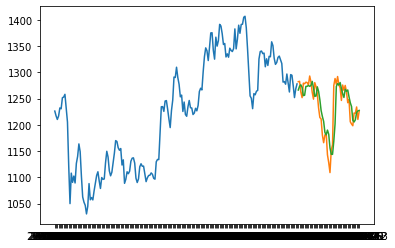

In [259]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
#predcition train no. of values from past 2 of train data
inputs = new_data[len(new_data) - len(valid) - 2:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(2,inputs.shape[0]):#<- here
    X_test.append(inputs[i-2:i,0])#<- here
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
import matplotlib.pyplot as plt
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms
train = new_data[:192]
valid = new_data[192:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [260]:
model_name='model_closing_single_column.pkl'

In [261]:
filename = "outputs/" + model_name

In [262]:
run = experiment.start_logging()
run.log("rmse", rms)

In [263]:
from sklearn.externals import joblib
joblib.dump(value=model, filename=filename)
run.upload_file(name=model_name, path_or_stream=filename)
run.complete()

In [264]:
experiment

Name,Workspace,Report Page,Docs Page
stock-experiment,doc-ws,Link to Azure Portal,Link to Documentation


In [265]:
run.download_file(name="model_closing_single_column.pkl")
model = run.register_model(model_name='stock-prediction-lstm-close',model_path='model_closing_single_column.pkl')
model

Model(workspace=Workspace.create(name='doc-ws', subscription_id='bd67f2e5-9d83-4dfc-aac1-25e560985901', resource_group='hackathon'), name=stock-prediction-lstm-close, id=stock-prediction-lstm-close:6, version=6, tags={}, properties={})

In [266]:
from azureml.core.conda_dependencies import CondaDependencies 

myenv = CondaDependencies()
myenv.add_conda_package("scikit-learn")
myenv.add_conda_package("keras")
myenv.add_conda_package("pandas")

with open("stock-predictor-lstm-env.yml", "w") as f:
    f.write(myenv.serialize_to_string())

In [267]:
from azureml.core.webservice import AciWebservice

aciconfig1 = AciWebservice.deploy_configuration(cpu_cores=1, 
                                               memory_gb=1, 
                                               tags={"data": "RIL-1",  
                                                     "method": "stock-predict-1"},
                                               description='predict reliance closing price')

In [268]:
from azureml.core import Workspace
from azureml.core.model import Model
from azureml.core.webservice import Webservice
from azureml.core.model import InferenceConfig
import os
ws = Workspace.from_config()
inference_config = InferenceConfig(runtime= "python", 
                                   entry_script="score_stocks.py",
                                   conda_file="stock-predictor-lstm-env.yml")

service = Model.deploy(workspace=ws, 
                       name='stocks-appjunkies-3',
                       models=[model], 
                       inference_config=inference_config,
                       deployment_config=aciconfig1)

service.wait_for_deployment(show_output=True)

Running....................................
SucceededACI service creation operation finished, operation "Succeeded"


## print(service.scoring_uri)

In [269]:
import requests

# send a random row from the test set to score
random_index = np.random.randint(0, len(X_test)-1)
input_data = "{\"data\": [" + str(list(X_test[random_index])) + "]}"

headers = {'Content-Type': 'application/json'}

# for AKS deployment you'd need to the service key in the header as well
# api_key = service.get_key()
# headers = {'Content-Type':'application/json',  'Authorization':('Bearer '+ api_key)} 

resp = requests.post(service.scoring_uri, input_data, headers=headers)

print("input data:", input_data)

print("POST to url", service.scoring_uri)
#print("input data:", input_data)
#print("label:", y_test[random_index])
print("prediction:", resp.text)

input data: {"data": [[array([0.63845041]), array([0.5739684])]]}
POST to url http://613f0fb6-faea-4c52-b87a-46a8260dd5fb.eastus2.azurecontainer.io/score
prediction: name 'scaler' is not defined


In [270]:
X_test

array([[[0.63234705],
        [0.65768882]],

       [[0.65768882],
        [0.66883371]],

       [[0.66883371],
        [0.67082389]],

       [[0.67082389],
        [0.6166909 ]],

       [[0.6166909 ],
        [0.58829777]],

       [[0.58829777],
        [0.66140357]],

       [[0.66140357],
        [0.6584847 ]],

       [[0.6584847 ],
        [0.66631294]],

       [[0.66631294],
        [0.66445525]],

       [[0.66445525],
        [0.65198357]],

       [[0.65198357],
        [0.69762493]],

       [[0.69762493],
        [0.66697634]],

       [[0.66697634],
        [0.61456823]],

       [[0.61456823],
        [0.58060234]],

       [[0.58060234],
        [0.66418995]],

       [[0.66418995],
        [0.64389004]],

       [[0.64389004],
        [0.60660751]],

       [[0.60660751],
        [0.53628777]],

       [[0.53628777],
        [0.48799251]],

       [[0.48799251],
        [0.48016459]],

       [[0.48016459],
        [0.39896526]],

       [[0.39896526],
        [0.3

In [271]:
inputs = new_data[len(new_data) - 3:]
a = inputs.to_dict()
data_set_1 = pd.DataFrame.from_dict({'Close': {'2019-09-11': 1234.099976,
  '2019-09-12': 1210.349976,
  '2019-09-13': 1225.550049}})
new_data_1 = pd.DataFrame(index=range(0,len(data_set_1)),columns=[ 'Close'])
for i in range(0,len(new_data_1)):
    #new_data_1['Date'][i] = data_set_1['Date'][i]
    new_data_1['Close'][i] = data_set_1['Close'][i]
new_data_1.values
def tx(new_data):
    inputs = new_data.values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(2,inputs.shape[0]):#<- here
        X_test.append(inputs[i-2:i,0])#<- here
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    return X_test

In [272]:
a = tx(new_data_1)
y_hat = model.predict(a)
y_hat = scaler.inverse_transform(y_hat)
y_hat

AttributeError: 'Model' object has no attribute 'predict'

In [ ]:
def tx():
    
    inputs = new_data[len(new_data) - 3:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(2,inputs.shape[0]):#<- here
        X_test.append(inputs[i-2:i,0])#<- here
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    return X_test

In [ ]:
d = tx()

In [ ]:
d

In [ ]:
from azureml.core.model import Model
from azureml.core import Workspace
ws = Workspace.from_config()
path = Model.get_model_path('stock-prediction-lstm-close',version=None, _workspace=ws)

In [ ]:
path

In [ ]:
model.